In [2]:
import tensorflow as tf
from helper_functions import load_tfrecord_dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [3]:
test_dataset = load_tfrecord_dataset('tfrecords/test.tfrecord')
test_dataset = test_dataset.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [4]:
def evaluate_model(model_name):
    model = tf.keras.models.load_model(model_name)  # Replace 'Model_Checkpoints' with the path to your saved model

    loss, accuracy = model.evaluate(test_dataset)
    print("Testing Loss: ", loss)
    print("Testing Accuracy: ", accuracy)

    # Predict probabilities for the test dataset
    y_pred_prob = model.predict(test_dataset)

    # Extract true labels from the test dataset
    y_true = np.concatenate([y for _, y in test_dataset], axis=0)

    y_pred_prob = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_true, axis=1)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()



1024/1024 [==============================] - 18s 11ms/step - loss: 0.5338 - accuracy: 0.7766
Testing Loss:  0.5338159799575806
Testing Accuracy:  0.776641845703125
1024/1024 [==============================] - 8s 7ms/step


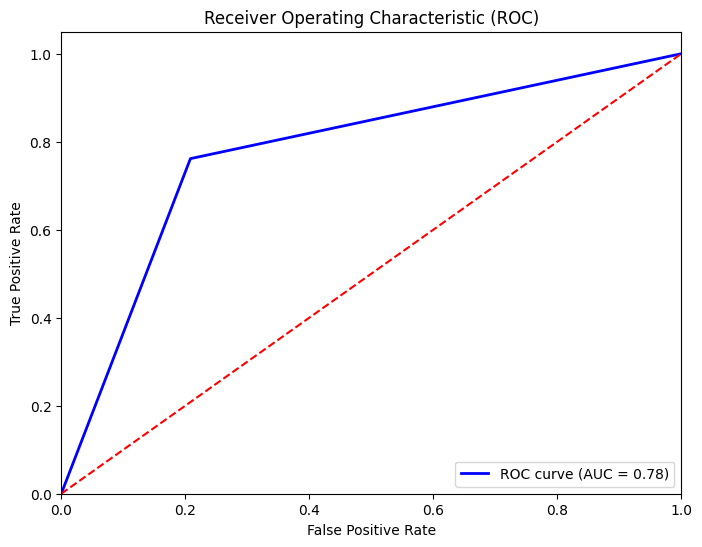

In [5]:
evaluate_model("ResNet_Model_Best1.h5")

1024/1024 [==============================] - 18s 17ms/step - loss: 0.4209 - auc: 0.8906
Testing Loss:  0.4208696484565735
Testing Accuracy:  0.8905597925186157
1024/1024 [==============================] - 17s 16ms/step


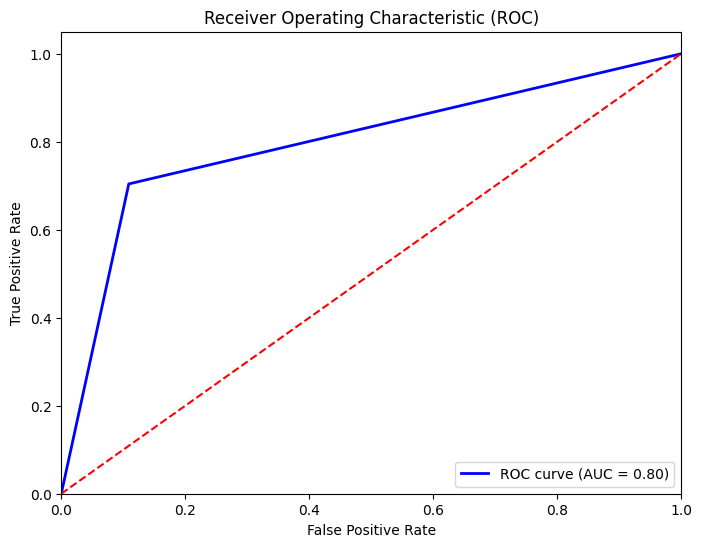

In [6]:
evaluate_model("VGG16_Model_Best.h5")

In [7]:
model = tf.keras.models.load_model("Model_Checkpoints")
model.save("VGG16_Model_Best.h5")